## Experiment 2 - influence of percentage visited per user on nDCG

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

In [95]:
Path = "../results/result_full Dataset_Ex2/"
ds = "gowalla"
alg = "STACP"
df_100 = pd.read_csv(Path+"result_top_10.txt", sep = "\t", header = None)
df_100.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_80 = pd.read_csv(Path+"result_top_20_80.txt", sep = "\t", header = None)
df_80.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_60 = pd.read_csv(Path+"result_top_20_60.txt", sep = "\t", header = None)
df_60.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]
df_40 = pd.read_csv(Path+"result_top_20_40.txt", sep = "\t", header = None)
df_40.columns = ["cnt", "uid", "prec", "rec", "ndcg", "map"]

In [71]:
ex2 = pd.DataFrame(columns = ["dataset","algorithm", "visited","nDCG", "map", "rec", "prec"]) 
ex2 = ex2.append({'dataset':ds,'algorithm': alg, 'visited':40,'nDCG':df_40["ndcg"].mean(),  'map':df_40["map"].mean(),  'rec':df_40["rec"].mean(),  'prec':df_40["prec"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,'algorithm': alg, 'visited':60,'nDCG':df_60["ndcg"].mean(),  'map':df_60["map"].mean(),  'rec':df_60["rec"].mean(),  'prec':df_60["prec"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,'algorithm': alg, 'visited':80,'nDCG':df_80["ndcg"].mean(),  'map':df_80["map"].mean(),  'rec':df_80["rec"].mean(),  'prec':df_80["prec"].mean()}, ignore_index=True)
ex2 = ex2.append({'dataset':ds,'algorithm': alg, 'visited':100,'nDCG':df_100["ndcg"].mean(),  'map':df_100["map"].mean(),  'rec':df_100["rec"].mean(),  'prec':df_100["prec"].mean()}, ignore_index=True)


In [82]:
ex2[["prec", "rec", "nDCG", "map"]]

,prec,rec,nDCG,map
0,0.026457,0.053464,0.028952,0.015974
1,0.028483,0.058430,0.031180,0.017743
2,0.030792,0.062946,0.034059,0.019537
3,0.032578,0.066694,0.036401,0.021671


In [73]:
print("decrease of nDCG: ",1-(float(ex2.loc[ex2["visited"]==40, "nDCG"])/float(ex2.loc[ex2["visited"]==100, "nDCG"])))
print("decrease of map: ",1-(float(ex2.loc[ex2["visited"]==40, "map"])/float(ex2.loc[ex2["visited"]==100, "map"])))
print("decrease of prec: ",1-(float(ex2.loc[ex2["visited"]==40, "prec"])/float(ex2.loc[ex2["visited"]==100, "prec"])))
print("decrease of rec: ",1-(float(ex2.loc[ex2["visited"]==40, "rec"])/float(ex2.loc[ex2["visited"]==100, "rec"])))

decrease of nDCG:  0.20462148896578147
decrease of map:  0.26288730450979614
decrease of prec:  0.18789200981730259
decrease of rec:  0.19837540291666433


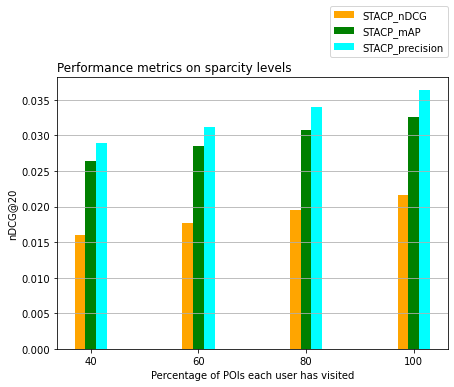

In [93]:
# create data 
x = np.arange(4) 
y1 = ex2.nDCG
y2 = ex2.map
y3 = ex2.prec
y4 = ex2.rec
width = 0.1
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(7,5));

plt.bar(x-0.1, y2, width, color='orange') 
plt.bar(x, y3, width, color='green') 
plt.bar(x+0.1, y1, width, color='cyan') 

#plt.bar(x+0.15, y4, width, color='red') 

plt.xticks(x, ['40', '60','80', '100']) 
plt.legend(["STACP_nDCG", "STACP_mAP", "STACP_precision", "STACP_recall"], bbox_to_anchor=(1, 1.26),borderaxespad=0) 
plt.xlabel("Percentage of POIs each user has visited") 
plt.ylabel("nDCG@20") 
plt.grid(axis = 'y')
plt.title("Performance metrics on sparcity levels", loc = "left")
plt.show() 

In [96]:
df_100.mean()

cnt     2813.500000
uid     2813.500000
prec       0.039250
rec        0.041841
ndcg       0.041720
map        0.021783
dtype: float64

In [18]:
print(stats.ttest_1samp(df_100["prec"],0.0146))
print(stats.ttest_1samp(df_100["rec"],0.0270))
print(stats.ttest_1samp(df_100["ndcg"],0.0079))

Ttest_1sampResult(statistic=26.13188265167397, pvalue=3.586215542013316e-142)
Ttest_1sampResult(statistic=24.996222490347336, pvalue=7.376677438656684e-131)
Ttest_1sampResult(statistic=34.82950904126524, pvalue=7.225210493794448e-241)


In [62]:
stats.ttest_ind(df_40["map"], df_60["map"])

Ttest_indResult(statistic=-2.0308510873860532, pvalue=0.042293562349607156)